In [108]:
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import deque

In [109]:
df_raw = pd.read_csv('combined_data_1.txt', header=None, names=['User', 'Rating', 'Date'], usecols=[0, 1, 2])

In [110]:

tmp_movies = df_raw[df_raw['Rating'].isna()]['User'].reset_index()
movie_indices = [[index, int(movie[:-1])] for index, movie in tmp_movies.values]

shifted_movie_indices = deque(movie_indices)
shifted_movie_indices.rotate(-1)

user_data = []


for [df_id_1, movie_id], [df_id_2, next_movie_id] in zip(movie_indices, shifted_movie_indices):
    

    if df_id_1<df_id_2:
        tmp_df = df_raw.loc[df_id_1+1:df_id_2-1].copy()
    else:
        tmp_df = df_raw.loc[df_id_1+1:].copy()
        

    tmp_df['Movie_Id'] = movie_id
    

    user_data.append(tmp_df)

movie_info = pd.concat(user_data)
del user_data, df_raw, tmp_movies, tmp_df, shifted_movie_indices, movie_indices, df_id_1, movie_id, df_id_2, next_movie_id
print('Shape User-Ratings:\t{}'.format(movie_info.shape))
movie_info.sample(5)

Shape User-Ratings:	(24053764, 4)


,User,Rating,Date,Movie_Id
8699816,291651,3.0,2005-12-01,1743
768448,122987,4.0,2004-01-26,191
15295168,1917589,4.0,2005-05-05,2938
21819600,1368891,3.0,2005-06-15,4123
9427272,84737,4.0,2002-10-08,1861


In [111]:
movie_title = pd.read_csv('movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])
movie_title.set_index('Movie_Id', inplace = True)
movie_title.head()

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [112]:

data_merge = pd.merge(movie_info, movie_title, on='Movie_Id')

In [113]:
data_merge.head()

,User,Rating,Date,Movie_Id,Year,Name
0,1488844,3.0,2005-09-06,1,2003.0,Dinosaur Planet
1,822109,5.0,2005-05-13,1,2003.0,Dinosaur Planet
2,885013,4.0,2005-10-19,1,2003.0,Dinosaur Planet
3,30878,4.0,2005-12-26,1,2003.0,Dinosaur Planet
4,823519,3.0,2004-05-03,1,2003.0,Dinosaur Planet


In [114]:
data_merge.sample(5)

,User,Rating,Date,Movie_Id,Year,Name
6385104,2258025,5.0,2005-10-14,1250,1996.0,Brassed Off
14576042,1234231,4.0,2002-07-16,2800,2001.0,Serendipity
11748801,2242711,5.0,2005-03-25,2251,1990.0,The Rookie
7859305,65003,1.0,2002-12-27,1574,1965.0,Dr. Goldfoot and the Bikini Machine
21685302,170794,4.0,2004-10-25,4080,2003.0,A Mighty Wind


In [115]:
data_merge.groupby('Name')['Rating'].mean().sort_values(ascending=False).head()

Name
Lost: Season 1                                                                 4.670989
Ghost in the Shell: Stand Alone Complex: 2nd Gig                               4.586364
The Simpsons: Season 6                                                         4.581296
Inu-Yasha                                                                      4.554434
Lord of the Rings: The Return of the King: Extended Edition: Bonus Material    4.552000
Name: Rating, dtype: float64

In [116]:
data_merge.groupby('Name')['Rating'].count().sort_values(ascending=False).head()

Name
Pirates of the Caribbean: The Curse of the Black Pearl    193941
What Women Want                                           162597
Bruce Almighty                                            160454
The Italian Job                                           156183
American Beauty                                           154832
Name: Rating, dtype: int64

In [117]:
ratings = pd.DataFrame(data_merge.groupby('Name')['Rating'].mean())
ratings.head()

,Rating
Name,
'N Sync: 'N the Mix,2.655936
'N Sync: PopOdyssey Live,3.413043
... And God Spoke,2.872222
10,3.127638
10 Minute Solution: Pilates,3.171779


In [118]:
ratings['num of ratings'] = pd.DataFrame(data_merge.groupby('Name')['Rating'].count().sort_values(ascending=False))
ratings.head()

,Rating,num of ratings
Name,,
'N Sync: 'N the Mix,2.655936,497
'N Sync: PopOdyssey Live,3.413043,92
... And God Spoke,2.872222,180
10,3.127638,4928
10 Minute Solution: Pilates,3.171779,163


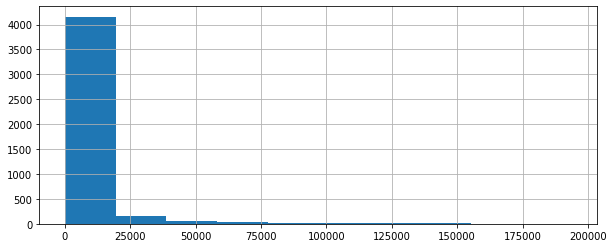

In [119]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist()

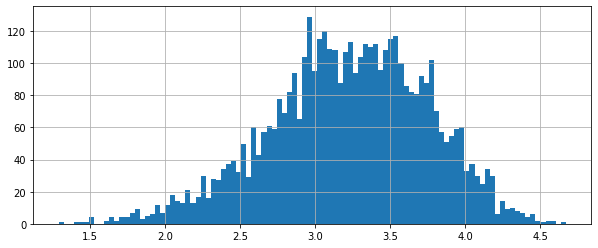

In [120]:
plt.figure(figsize=(10,4))
ratings['Rating'].hist(bins=100)

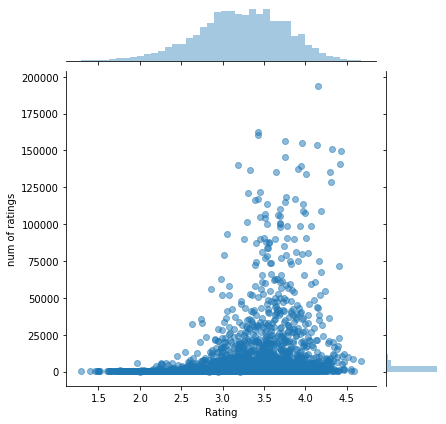

In [121]:
sns.jointplot(x='Rating',y='num of ratings',data=ratings,alpha=0.5)

In [122]:
data_model = data_merge.drop(columns=['Date','Year','Name'])
data_model.head()

,User,Rating,Movie_Id
0,1488844,3.0,1
1,822109,5.0,1
2,885013,4.0,1
3,30878,4.0,1
4,823519,3.0,1


In [59]:
print(data_model.shape)
print(data_model.User.nunique())
print(data_model.Movie_Id.nunique())
data_model.isna().sum()

(24053764, 3)
470758
4499


User        0
Rating      0
Movie_Id    0
dtype: int64

In [123]:
data_model.dtypes

User         object
Rating      float64
Movie_Id      int64
dtype: object

In [124]:
columns_titles = ["Movie_Id",'User',"Rating"]
data_model=data_model.reindex(columns=columns_titles)
data_model.head()

,Movie_Id,User,Rating
0,1,1488844,3.0
1,1,822109,5.0
2,1,885013,4.0
3,1,30878,4.0
4,1,823519,3.0


In [125]:
data_model=data_model.sample(20000)

In [126]:
data_model.tail()

,Movie_Id,User,Rating
23830781,4463,1135017,2.0
21903136,4123,670553,3.0
18628064,3573,1179646,1.0
1591659,313,1062828,3.0
22575187,4269,1076678,1.0


In [127]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(data_model, test_size=0.3, random_state=1)
print(f"Shape of train data: {Xtrain.shape}")
print(f"Shape of test data: {Xtest.shape}")

Shape of train data: (14000, 3)
Shape of test data: (6000, 3)


In [128]:
data_model['Rating_category'] = np.where(data_model.Rating >3 ,1,0)

In [129]:
data_model.tail(10)

,Movie_Id,User,Rating,Rating_category
11642251,2205,1195989,4.0,1
2089955,393,864334,4.0,1
19415791,3689,740954,4.0,1
11248699,2162,499718,4.0,1
15704336,3063,2134686,3.0,0
23830781,4463,1135017,2.0,0
21903136,4123,670553,3.0,0
18628064,3573,1179646,1.0,0
1591659,313,1062828,3.0,0
22575187,4269,1076678,1.0,0


LOGISTIC REGRESSION

In [130]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['User']
X = data_model[feature_cols]
y = data_model.Rating_category

logreg.fit(X,y)
pred = logreg.predict(X)

In [131]:
X.head()

,User
5387239,2014322
16704936,869446
9805551,2372333
21646552,308312
17187749,404578


In [132]:
logreg.predict_proba(X)[0:5]

array([[0.42235963, 0.57764037],
       [0.46626594, 0.53373406],
       [0.40884517, 0.59115483],
       [0.48802174, 0.51197826],
       [0.48428387, 0.51571613]])

In [133]:
data_model['Rating_CatergoryProb'] = logreg.predict_proba(X)[:, 1]

In [134]:
data_model.head()

,Movie_Id,User,Rating,Rating_category,Rating_CatergoryProb
5387239,1102,2014322,4.0,1,0.577640
16704936,3253,869446,4.0,1,0.533734
9805551,1905,2372333,5.0,1,0.591155
21646552,4072,308312,5.0,1,0.511978
17187749,3315,404578,5.0,1,0.515716


In [135]:
print(logreg.predict_proba([[1]]))
print(logreg.predict_proba([[2]]))
print(logreg.predict_proba([[3]]))

[[0.49999996 0.50000004]]
[[0.49999992 0.50000008]]
[[0.49999988 0.50000012]]


In [136]:
print(logreg.predict_proba([[2.5]]))

[[0.4999999 0.5000001]]


DECISION TREE APPROACH 


In [99]:
feature_cols = ['User']
X = data_model[feature_cols]
y = data_model.Rating_category

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import pydotplus
from IPython.display import Image 

tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

tree_model.fit(X_train,y_train)

y_pred=tree_model.predict(X_test)
print(y_pred)

# Calculate score
tree_model.score(X_test,y_test)

[1 1 1 ... 1 1 1]


0.56275

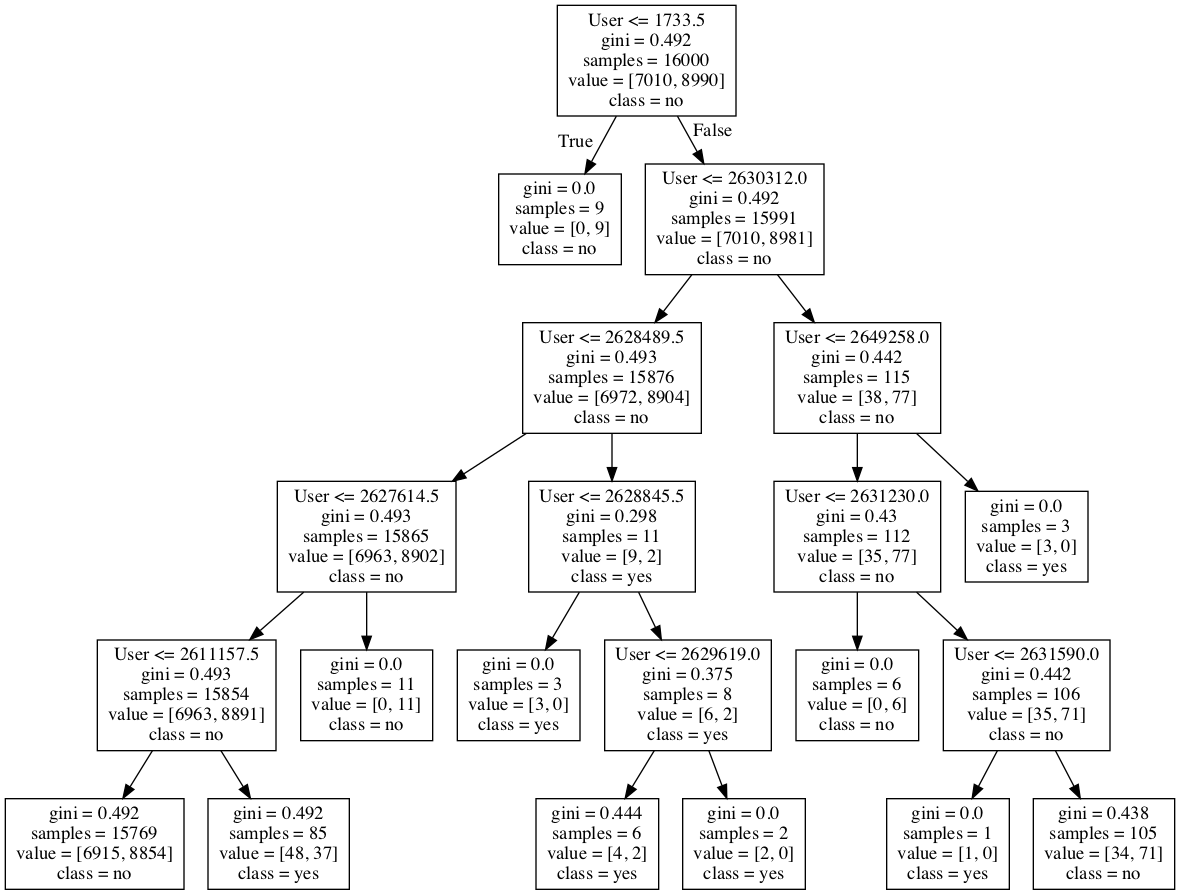

In [105]:
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                feature_names=X.columns.values,  
                                class_names=['yes','no'])
graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

In [106]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.01      0.01      1746
           1       0.56      0.99      0.72      2254

    accuracy                           0.56      4000
   macro avg       0.50      0.50      0.37      4000
weighted avg       0.51      0.56      0.41      4000

